<a href="https://colab.research.google.com/github/jeibloo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=180.18849314523848, mobile=False), User(purchased=True, time_on_site=135.67700482149365, mobile=False), User(purchased=True, time_on_site=159.88535379510446, mobile=True), User(purchased=True, time_on_site=257.7835981679507, mobile=True), User(purchased=False, time_on_site=86.99445445027507, mobile=False), User(purchased=False, time_on_site=173.67358829592212, mobile=True), User(purchased=True, time_on_site=44.968058188901246, mobile=True), User(purchased=False, time_on_site=30.15219480121866, mobile=True), User(purchased=False, time_on_site=460.0007745853941, mobile=False), User(purchased=False, time_on_site=122.22911474525455, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,180.188493,False
1,True,135.677005,False
2,True,159.885354,True
3,True,257.783598,True
4,False,86.994454,False


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.395806383057993,5.457727420381445,6.012980358659168,6.370819673044487,6.526220869482321,6.618506115477453,6.744300972093091,6.937814523764514,7.022230321283178,7.738183255456649,...,570.7205763776294,572.579212329361,573.071762294419,577.5607756708825,578.0265919014007,578.8349054472059,584.0914381586123,586.960469433746,588.7975083689481,599.8083961016524
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,1,1
True,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,240,233,105,29,28
True,96,131,102,20,16


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,0.714286,0.64011,0.507246,0.591837,0.636364
True,0.285714,0.35989,0.492754,0.408163,0.363636


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.672,0.622667
True,0.328,0.377333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
!pip freeze

In [0]:
!pip install pandas==0.23.4

In [3]:
### Here we import Pandas and get the csv file, setting the index to the leftmost column.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jeibloo/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv',index_col=0)
df.head(3)

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220


In [37]:
# Check for nulls and the like
df.isnull().sum()

age              0
weight           0
exercise_time    0
dtype: int64

In [30]:
# Let's see what this data looks like as a whole
df.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [31]:
# Now let's see what the actual datatypes are for the data 
df.dtypes

age              int64
weight           int64
exercise_time    int64
dtype: object

In [59]:
### For related variables I'm going to look at weight and age, and age with exercise time.
weight_bin = pd.cut(df.weight, 8)
age_bin = pd.cut(df.age,8)
exercise_bin = pd.cut(df.exercise_time,5)
pd.crosstab([age_bin,exercise_bin],weight_bin, normalize='index')

weight                          (99.854, 118.25]       ...         (227.75, 246.0]
age             exercise_time                          ...                        
(17.938, 25.75] (-0.3, 60.0]            0.153846       ...                0.153846
                (60.0, 120.0]           0.088235       ...                0.000000
                (120.0, 180.0]          0.194444       ...                0.000000
                (180.0, 240.0]          0.184211       ...                0.000000
                (240.0, 300.0]          0.500000       ...                0.000000
(25.75, 33.5]   (-0.3, 60.0]            0.105263       ...                0.052632
                (60.0, 120.0]           0.227273       ...                0.000000
                (120.0, 180.0]          0.250000       ...                0.000000
                (180.0, 240.0]          0.285714       ...                0.000000
                (240.0, 300.0]          0.325000       ...                0.000000
(33.5, 41.25]   (-0.3, 60.0]            0.100000       ...                0.050000
                (60.0, 120.0]           0.177778       ...                0.000000
                (120.0, 180.0]          0.384615       ...                0.000000
                (180.0, 240.0]          0.294118       ...                0.000000
                (240.0, 300.0]          0.342857       ...                0.000000
(41.25, 49.0]   (-0.3, 60.0]            0.090909       ...                0.136364
                (60.0, 120.0]           0.041667       ...                0.000000
                (120.0, 180.0]          0.100000       ...                0.000000
                (180.0, 240.0]          0.315789       ...                0.000000
                (240.0, 300.0]          0.225000       ...                0.000000
(49.0, 56.75]   (-0.3, 60.0]            0.210526       ...                0.052632
                (60.0, 120.0]           0.043478       ...                0.000000
                (120.0, 180.0]          0.200000       ...                0.000000
                (180.0, 240.0]          0.200000       ...                0.000000
                (240.0, 300.0]          0.277778       ...                0.000000
(56.75, 64.5]   (-0.3, 60.0]            0.137931       ...                0.068966
                (60.0, 120.0]           0.088889       ...                0.000000
                (120.0, 180.0]          0.148148       ...                0.000000
                (180.0, 240.0]          0.212121       ...                0.000000
                (240.0, 300.0]          0.263158       ...                0.000000
(64.5, 72.25]   (-0.3, 60.0]            0.106383       ...                0.191489
                (60.0, 120.0]           0.114754       ...                0.000000
                (120.0, 180.0]          0.119048       ...                0.000000
                (180.0, 240.0]          0.307692       ...                0.000000
                (240.0, 300.0]          0.000000       ...                0.000000
(72.25, 80.0]   (-0.3, 60.0]            0.122807       ...                0.070175
                (60.0, 120.0]           0.096774       ...                0.016129
                (120.0, 180.0]          0.333333       ...                0.000000

[38 rows x 8 columns]

In [60]:
### Now I shall check if age and exercise time are related.
pd.crosstab(age_bin,exercise_bin)

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 25.75]",26,34,36,38,20
"(25.75, 33.5]",38,22,32,35,40
"(33.5, 41.25]",40,45,26,34,35
"(41.25, 49.0]",22,24,20,19,40
"(49.0, 56.75]",19,23,25,20,36
"(56.75, 64.5]",29,45,27,33,19
"(64.5, 72.25]",47,61,42,13,1
"(72.25, 80.0]",57,62,15,0,0


Hmmm it seems there may be something when it comes to getting older and being unable to exercise for long amounts of time (not novel but it's nice to see that result play out)

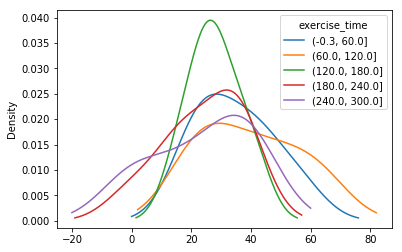

In [61]:
elder = pd.crosstab(age_bin,exercise_bin)
elder.plot.kde()

It seems pretty clear that if quite old people exercise they seem to be able to do  it for a very short amount of time.

In [74]:
### Let's see weight and exercise time
pd.crosstab(exercise_bin,weight_bin, normalize='index')

weight,"(99.854, 118.25]","(118.25, 136.5]","(136.5, 154.75]","(154.75, 173.0]","(173.0, 191.25]","(191.25, 209.5]","(209.5, 227.75]","(227.75, 246.0]"
exercise_time,,,,,,,,
"(-0.3, 60.0]",0.122302,0.100719,0.122302,0.115108,0.143885,0.158273,0.140288,0.097122
"(60.0, 120.0]",0.110759,0.148734,0.145570,0.189873,0.167722,0.145570,0.088608,0.003165
"(120.0, 180.0]",0.206278,0.161435,0.206278,0.170404,0.152466,0.098655,0.004484,0.000000
"(180.0, 240.0]",0.250000,0.250000,0.234375,0.192708,0.072917,0.000000,0.000000,0.000000
"(240.0, 300.0]",0.308901,0.382199,0.219895,0.089005,0.000000,0.000000,0.000000,0.000000


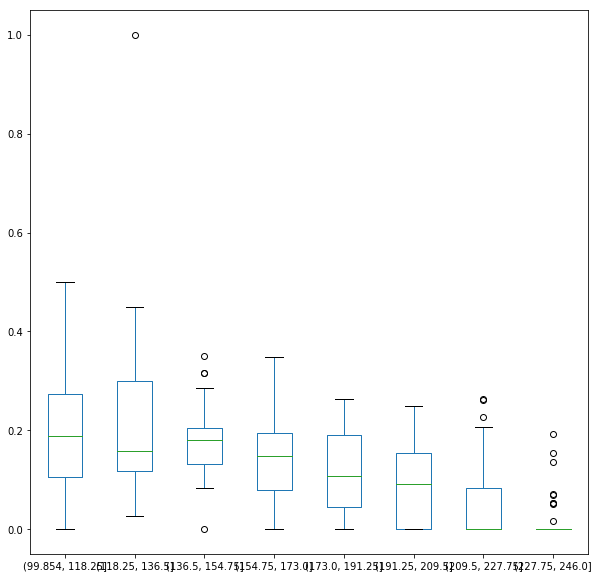

In [62]:
### There may also be a relationship between age+weight and exercise time. 
ah = pd.crosstab([age_bin,exercise_bin],weight_bin, normalize='index')
ah.plot(kind='box',figsize=(10,10));

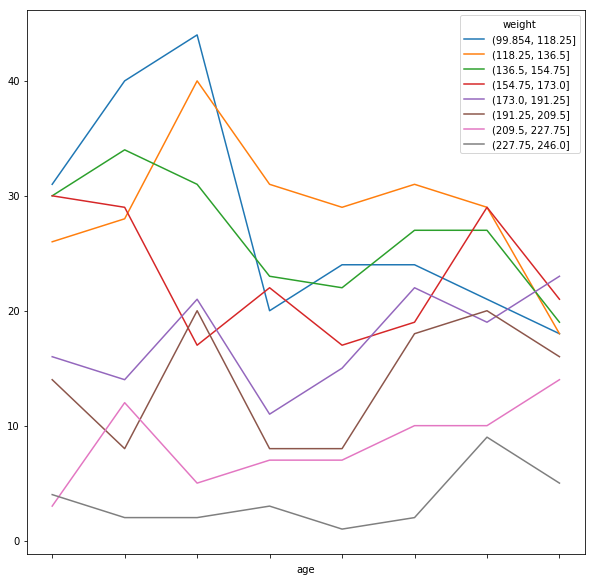

In [73]:
### Now for something potentially unrelated I'm going to look at age and weight.
weight = pd.crosstab(age_bin,weight_bin)
weight.plot(figsize=(10,10))

It seems like possibly we tend to average out our weights as get to the extreme ends of age.

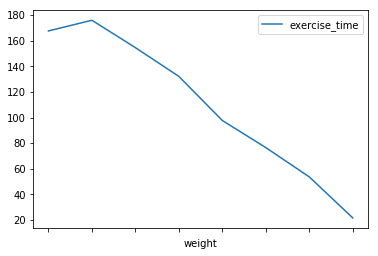

In [67]:
### Let's try pivot tables
piv = pd.pivot_table(df,values='exercise_time',index=weight_bin)
piv.plot()

In [83]:
### Let see further as to which relations are 'spurious' heh
df.corr()

,age,weight,exercise_time
age,1.000000,0.144168,-0.273818
weight,0.144168,1.000000,-0.478021
exercise_time,-0.273818,-0.478021,1.000000


Again, not sure, but it seems the least linked of the three are age and weight. Not sure if true.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
>>Well if you mean literally than they are all int64. But, for age: discrete ordinal; weight: continous ordinal; exercise time: continous ordinal
2.  What are the relationships between the variables?
>>It seems possible that age affects both the amount of time one is able to exercise and more generally, how much you weigh. People's weights tend to average as they near the upper limits of human age, heavier people losing weight and lighter people gaining a bit of weight. People also (maybe obviously) cannot exercise for a long amount of time as they get much older. 
3.  Which relationships are "real", and which spurious?
>>This is something I'm having a bit of hard time with...The small tenous link seems to be maybe weight and age. I observed some averaging near the upper age limit but I'm not sure if that indicates a spurious link. And if I do say so I believe that may be the only dead link amongst the three variables.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)